In [1]:
import pandas as pd
from gower.gower_dist import *

In [2]:
a = ['a'] * 10
b = list('abcdefghij')
c = ['a'] * 1 + ['b'] * 9
d = ['a'] * 2 + ['b'] * 8
e = ['a'] * 5 + ['b'] * 5
f = ['a'] * 4 + ['b'] * 6
g = ['a'] * 3 + ['b'] * 7
h = list('abcdeabcde')
i = ['a'] * 1 + ['b'] * 3 + ['c'] * 3 + ['d'] * 3
j = ['a'] * 1 + ['b'] * 1 + ['c'] * 1 + ['d'] * 1 + ['e'] * 1 + ['f'] * 1 + ['g'] * 1 + ['h'] * 3
k = ['a'] * 1 + ['b'] * 2 + ['c'] * 2 + ['d'] * 5
l = ['a'] * 1 + ['b'] * 1 + ['c'] * 4 + ['d'] * 4
m = ['a'] * 1 + ['b'] * 1 + ['c'] * 1 + ['d'] * 7
n = ['a'] * 1 + ['b'] * 1 + ['c'] * 1 + ['d'] * 1 + ['e'] * 1 + ['f'] * 1 + ['g'] * 4
o = ['a'] * 1 + ['b'] * 1 + ['c'] * 1 + ['d'] * 1 + ['e'] * 6
p = ['a'] * 1 + ['b'] * 1 + ['c'] * 1 + ['d'] * 1 + ['e'] * 1 + ['f'] * 5

dict(zip(list("abcdefghijklmnop"), process_map(get_cat_weight, np.array([a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p]))))

  0%|          | 0/16 [00:00<?, ?it/s]

{'a': 0,
 'b': 0,
 'c': 0.16000000000000003,
 'd': 0.2291358024691358,
 'e': 0.24691358024691357,
 'f': 0.24888888888888888,
 'g': 0.24888888888888888,
 'h': 0.32098765432098725,
 'i': 0.3733333333333334,
 'j': 0.382222222222221,
 'k': 0.45629629629629614,
 'l': 0.45629629629629614,
 'm': 0.5807407407407408,
 'n': 0.5970370370370368,
 'o': 0.7222222222222223,
 'p': 0.7259259259259262}

In [3]:
df = pd.DataFrame({"Sex1": ["M", "M", "F", "F", "F", "M", "M", "F", "F", "F"],
                   "Sex2": ["M", "M", "F", "F", "F", "F", "F", "M", "M", "M"],
                   "Age1": [15] * 10,
                   "Age2": [15, 36, 58, 78, 100, 15, 36, 58, 78, 100]})

In [4]:
df.loc[np.argsort(np.diag(gower_matrix(df[["Sex1", "Age1"]].to_numpy(), df[["Sex2", "Age2"]].to_numpy(), weight=np.ones(2))))]

  0%|          | 0/10 [00:00<?, ?it/s]

,Sex1,Sex2,Age1,Age2
0,M,M,15,15
1,M,M,15,36
2,F,F,15,58
3,F,F,15,78
4,F,F,15,100
5,M,F,15,15
6,M,F,15,36
7,F,M,15,58
8,F,M,15,78
9,F,M,15,100


In [5]:
df.loc[np.argsort(np.diag(gower_matrix(df[["Sex1", "Age1"]].to_numpy(), df[["Sex2", "Age2"]].to_numpy())))]


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

,Sex1,Sex2,Age1,Age2
0,M,M,15,15
1,M,M,15,36
5,M,F,15,15
6,M,F,15,36
2,F,F,15,58
3,F,F,15,78
7,F,M,15,58
8,F,M,15,78
4,F,F,15,100
9,F,M,15,100


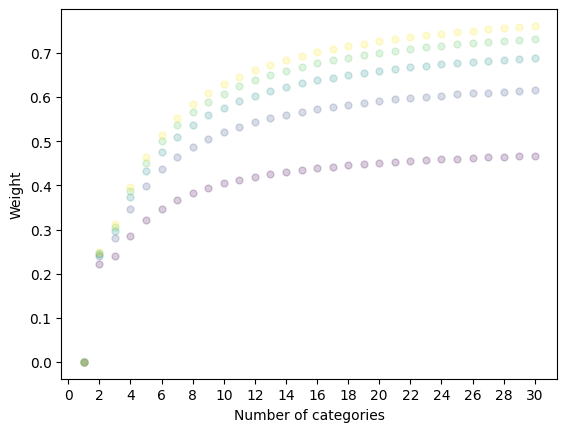

In [6]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

colors = mcolors._colors_full_map

for i in range(1, 31):
    X = []
    for j in range(2, 7):
        x = get_cat_weight(list(''.join(chr(k) for k in range(i))) * j)
        plt.scatter(i, x, c=j, alpha=0.2, s=25, vmin=2, vmax=6)
        X.append(x)
plt.xticks(range(0, 31, 2))
plt.xlabel("Number of categories")
plt.ylabel("Weight")

plt.show()
